In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_csv('./Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [4]:
df[df['size'].isnull()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185
1775,Plot Area,Immediate Possession,IVC Road,NaN,Orana N,2000 - 5634,NaN,NaN,124.000
2264,Plot Area,Immediate Possession,Banashankari,NaN,NaN,2400,NaN,NaN,460.000
2809,Plot Area,Immediate Possession,Sarjapur Road,NaN,AsdiaAr,1200 - 2400,NaN,NaN,28.785
2862,Plot Area,Immediate Possession,Devanahalli,NaN,Ajleyor,1500 - 2400,NaN,NaN,46.800
5333,Plot Area,Immediate Possession,Devanahalli,NaN,Emngs S,2100 - 5405,NaN,NaN,177.115
6423,Plot Area,Immediate Possession,Whitefield,NaN,SRniaGa,2324,NaN,NaN,26.730
6636,Plot Area,Immediate Possession,Jigani,NaN,S2enste,1500,NaN,NaN,25.490
6719,Plot Area,Immediate Possession,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545
7680,Plot Area,Immediate Possession,Kasavanhalli,NaN,NaN,5000,NaN,NaN,400.000


In [5]:
df.drop(df[df['size'].isnull()].index,inplace=True)

In [6]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       '19-May', '17-Nov', '20-Oct', '20-Jun', '19-Feb', '21-Oct',
       '21-Jan', '17-Mar', '17-Apr', '22-May', '19-Oct', '21-Jul',
       '21-Nov', '21-Mar', '16-Dec', '22-Mar', '20-Jan', '21-Sep',
       '21-Aug', '14-Nov', '19-Nov', '15-Nov', '16-Jul', '15-Jun',
       '17-Feb', '20-Nov', '20-Jul', '16-Sep', '15-Oct', '15-Dec',
       '16-Oct', '22-Nov', '15-Aug', '17-Jan', '16-Nov', '20-Apr',
       '16-Jan', '14-Jul'], dtype=object)

In [7]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [11]:
df['society'].fillna(value='GrrvaGr',inplace=True)
df['location'].fillna(value=df['location'].mode()[0],inplace=True)

In [12]:
from sklearn.preprocessing import LabelEncoder
ln = LabelEncoder()
df['society'] = ln.fit_transform(df['society'])
ln2 = LabelEncoder()
df['availability'] = ln2.fit_transform(df['availability'])
ln3 = LabelEncoder()
df['location'] = ln3.fit_transform(df['location'])
ln4 = LabelEncoder()
df['area_type'] = ln4.fit_transform(df['area_type'])

In [13]:
def getNum(s):
    s = s.split(" ")
    return int(s[0])

In [14]:
df['size']=df['size'].apply(getNum)

In [15]:
df['balcony'].fillna(value=df['balcony'].mode()[0],inplace=True)

In [16]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,3,40,419,2,460,1056,2.0,1.0,39.07
1,2,79,317,4,2427,2600,5.0,3.0,120.00
2,0,79,1178,3,801,1440,2.0,3.0,62.00
3,3,79,756,3,2174,1521,3.0,1.0,95.00
4,3,79,715,2,801,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,0,79,1251,5,207,3453,4.0,0.0,231.00
13316,3,79,1003,4,801,3600,5.0,2.0,400.00
13317,0,79,971,2,1211,1141,2.0,1.0,60.00
13318,3,32,906,4,2193,4689,4.0,1.0,488.00


In [17]:
df['bath'].fillna(df['bath'].mode()[0],inplace=True)

In [18]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [19]:
l = []
k = 0
for i in df['total_sqft'].index:
    try:
        float(df.loc[i,'total_sqft'])
    except:
        if('-' not in df.loc[i,'total_sqft']):
            l.append(i)
            k +=1
        else:
            s = df.loc[i,'total_sqft'].split('-')
            df.loc[i,'total_sqft'] = (float(s[0]) + float(s[1])) /2 

In [20]:
k

46

In [21]:
for i in l:
    if 'Sq. Meter' in df.loc[i,'total_sqft']:
        df.loc[i,'total_sqft'] = float(df.loc[i,'total_sqft'].replace('Sq. Meter',''))*11
        continue
    if 'Acres' in df.loc[i,'total_sqft']:
        df.loc[i,'total_sqft'] = float(df.loc[i,'total_sqft'].replace('Acres',''))*43561
        continue
    if 'Sq. Yards' in df.loc[i,'total_sqft']:
        df.loc[i,'total_sqft'] = float(df.loc[i,'total_sqft'].replace('Sq. Yards',''))*4840.1
        continue
    if 'Cents' in df.loc[i,'total_sqft']:
        df.loc[i,'total_sqft'] = float(df.loc[i,'total_sqft'].replace('Cents',''))*272
        continue
    if 'Perch' in df.loc[i,'total_sqft']:
        df.loc[i,'total_sqft'] = float(df.loc[i,'total_sqft'].replace('Perch',''))*435 
        continue
    if 'Guntha' in df.loc[i,'total_sqft']:
        df.loc[i,'total_sqft'] = float(df.loc[i,'total_sqft'].replace('Guntha',''))*1089
        continue
    if 'Grounds' in df.loc[i,'total_sqft']:
        df.loc[i,'total_sqft'] = float(df.loc[i,'total_sqft'].replace('Grounds',''))*2400
        continue

In [22]:
# l = []
# k = 0
# for i in df['total_sqft'].index:
#     try:
#         float(df.loc[i,'total_sqft'])
#     except:
#         if('-' not in df.loc[i,'total_sqft']):
#             l.append(i)
#             k +=1
        

In [23]:
# df.drop(index=l,inplace=True)

In [24]:
df['total_sqft'] = df['total_sqft'].astype('f')

In [25]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,3,40,419,2,460,1056.0,2.0,1.0,39.07
1,2,79,317,4,2427,2600.0,5.0,3.0,120.00
2,0,79,1178,3,801,1440.0,2.0,3.0,62.00
3,3,79,756,3,2174,1521.0,3.0,1.0,95.00
4,3,79,715,2,801,1200.0,2.0,1.0,51.00


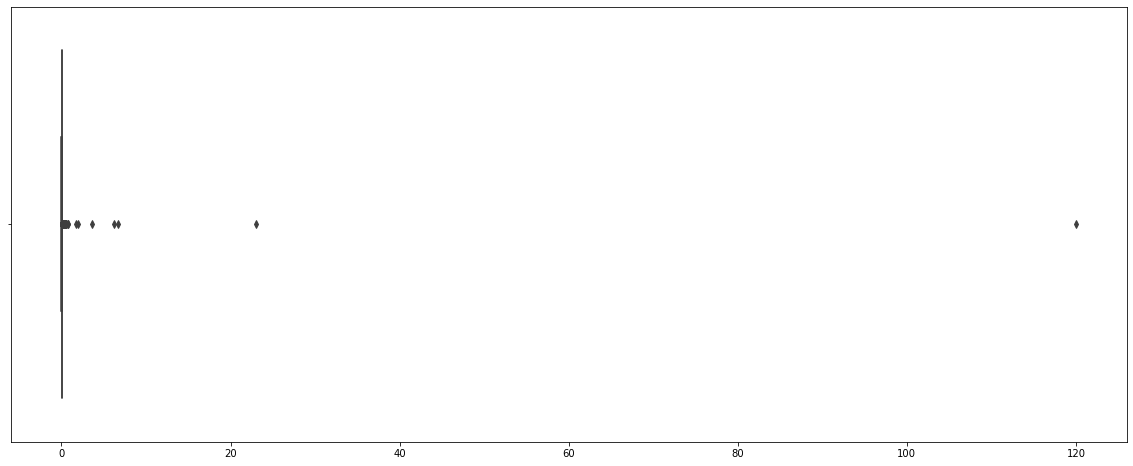

In [26]:
plt.figure(figsize=(20,8))
sns.boxplot(x=df['price']/df['total_sqft'])

In [27]:
df.drop(df[df['price']/df['total_sqft'] > 0.10].index,inplace=True)
df.drop(df[df['price']/df['total_sqft'] < 0.009].index,inplace=True)

In [28]:
x = df.iloc[:,[3,5,6,7]]
x.head()

,size,total_sqft,bath,balcony
0,2,1056.0,2.0,1.0
1,4,2600.0,5.0,3.0
2,3,1440.0,2.0,3.0
3,3,1521.0,3.0,1.0
4,2,1200.0,2.0,1.0


In [29]:
y = df['price']
y.head(2)

0     39.07
1    120.00
Name: price, dtype: float64

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x =pd.DataFrame(sc.fit_transform(x),columns=['size','total_sqft', 'bath','balcony'])

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [33]:
y_pred = lr.predict(x_test)

In [34]:
lr.score(x_train,y_train)

0.6867918705656504

In [35]:
for i in range(1,50):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = (i/100),random_state=10)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    print(i,lr.score(x_train,y_train)*100)

1 71.8959414214021
2 71.86055011567092
3 71.75722144405994
4 71.70673754132015
5 76.85758791052434
6 79.35381789921236
7 79.42654297572092
8 79.47029731795502
9 79.44928593859915
10 79.46801660052826
11 79.4863958238317
12 79.5080872614298
13 79.49133885303294
14 79.4647786616214
15 79.51421492203468
16 79.49780840900634
17 79.44592401567397
18 79.4078947306486
19 79.40294670988081
20 79.55025383680876
21 79.50232018147646
22 79.47542546274553
23 79.51532383620454
24 79.49627180524594
25 79.55651343066697
26 79.53902738627782
27 79.58831874957866
28 79.69444201802524
29 79.70053886592424
30 79.64870214187154
31 79.74739150001908
32 79.72101541662389
33 79.75810423219681
34 79.75115070375894
35 79.7749656801007
36 79.88753685944616
37 80.10790536248024
38 80.44414953891146
39 80.49383255571408
40 80.51661276354082
41 80.53981369024457
42 80.55858248120916
43 80.68256110818672
44 80.80046909854826
45 80.74296961658108
46 80.61708995725274
47 80.59857208670618
48 80.54012370802887
49 80.5

In [36]:
df.corr()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
area_type,1.000000,-0.097786,0.032785,-0.115659,0.066302,-0.070713,-0.097195,0.091624,-0.064264
availability,-0.097786,1.000000,0.002813,0.059888,-0.068782,0.024530,0.039595,0.115607,0.027635
location,0.032785,0.002813,1.000000,0.010962,-0.011585,0.035502,0.024728,0.004210,0.041969
size,-0.115659,0.059888,0.010962,1.000000,-0.062554,0.532593,0.873896,0.212661,0.516950
society,0.066302,-0.068782,-0.011585,-0.062554,1.000000,-0.011698,-0.039639,-0.004329,0.006091
total_sqft,-0.070713,0.024530,0.035502,0.532593,-0.011698,1.000000,0.562583,0.180753,0.831145
bath,-0.097195,0.039595,0.024728,0.873896,-0.039639,0.562583,1.000000,0.209072,0.572826
balcony,0.091624,0.115607,0.004210,0.212661,-0.004329,0.180753,0.209072,1.000000,0.171923
price,-0.064264,0.027635,0.041969,0.516950,0.006091,0.831145,0.572826,0.171923,1.000000


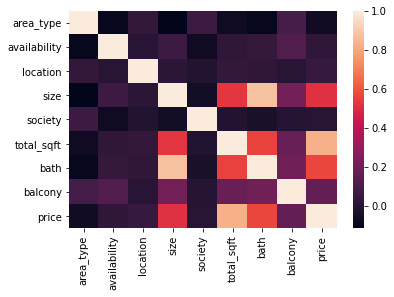

In [37]:
sns.heatmap(df.corr())

In [64]:
from sklearn import tree
dtree = tree.DecisionTreeRegressor(max_depth=3)

In [65]:
reg = dtree.fit(x_train,y_train)

In [66]:
y_pred = reg.predict(x_test)

In [67]:
reg.score(x_test,y_test)

0.46353774104138656

In [73]:
from sklearn.neighbors import KNeighborsRegressor
l = []
for i in range(3,100,3):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    l.append([i,knn.score(x_test,y_test)])
pd.DataFrame(l,columns=['K Values','Accuracy'])

,K Values,Accuracy
0,3,0.633183
1,6,0.716600
2,9,0.767804
3,12,0.776879
4,15,0.783658
5,18,0.785275
6,21,0.784656
7,24,0.784232
8,27,0.783133
9,30,0.781978


In [76]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(n_estimators=200)
rfreg.fit(x_train,y_train)

RandomForestRegressor(n_estimators=200)

In [77]:
rfreg.score(x_test,y_test)

0.5908873092499838